In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
from matplotlib.pyplot import *
import math

In [6]:
MH200=pd.read_csv('MH200.csv')
MH200.drop(MH200.filter(regex="Unname"),axis=1, inplace=True)
MH200

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.40,4.377,0.0,0.000,77.60,4.377,1.00,0.000,1.00,0.000,0.03,0.002,0.05,0.003,0.741
1,200,1,50,36.0,9.236,467786.60,402.142,0.0,0.000,31677.40,399.884,0.94,0.001,1.00,0.000,0.00,0.000,0.00,0.001,0.376
2,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.00,0.000,0.19,0.005,0.32,0.006,0.100
3,200,3,10,2.0,0.000,499497.50,0.500,0.0,0.000,0.50,0.500,1.00,0.000,1.00,0.000,0.83,0.167,0.90,0.100,0.891
4,200,3,20,2.0,0.000,499425.80,3.720,0.0,0.000,72.20,3.720,1.00,0.000,1.00,0.000,0.03,0.001,0.05,0.003,0.741
5,200,3,50,2539.4,171.713,466499.80,1209.553,228.6,30.276,30232.20,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
6,200,3,100,339339.0,2268.604,103680.60,2307.697,38956.2,1341.834,17524.20,1093.083,0.89,0.001,0.90,0.003,0.95,0.003,0.92,0.001,0.100
7,200,5,10,2.0,0.000,499496.50,0.645,0.0,0.000,1.50,0.645,1.00,0.000,1.00,0.000,0.64,0.131,0.76,0.093,0.891
8,200,5,20,10.6,1.288,499424.20,2.800,1.6,0.245,63.60,2.064,1.00,0.000,0.87,0.015,0.14,0.014,0.24,0.020,0.741
9,200,5,50,18366.2,662.229,446175.40,2694.977,23838.4,1931.082,11120.00,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


In [7]:
MH200.columns

Index(['MH', 'LSH', 'band', 'TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE',
       'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE', 'Accuracy_mean', 'Acc_1SE',
       'Precision_mean', 'Prec_1SE', 'Recall_mean', 'Recall_1SE', 'F1_mean',
       'F1_1SE', 'SIM_t'],
      dtype='object')

In [8]:
MH200.band.unique()

array([ 20,  50, 100,  10], dtype=int64)

## MH200 B100

In [12]:
MH200B100=MH200[MH200['band'].eq(100)]
MH200B100.drop(MH200B100.filter(regex="Unname"),axis=1, inplace=True)
MH200B100

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
2,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.0,0.000,0.19,0.005,0.32,0.006,0.1
6,200,3,100,339339.0,2268.604,103680.60,2307.697,38956.2,1341.834,17524.20,1093.083,0.89,0.001,0.9,0.003,0.95,0.003,0.92,0.001,0.1
10,200,5,100,334818.8,3515.800,109162.20,2946.325,35509.0,1829.659,20010.00,1529.938,0.89,0.002,0.9,0.004,0.94,0.004,0.92,0.002,0.1


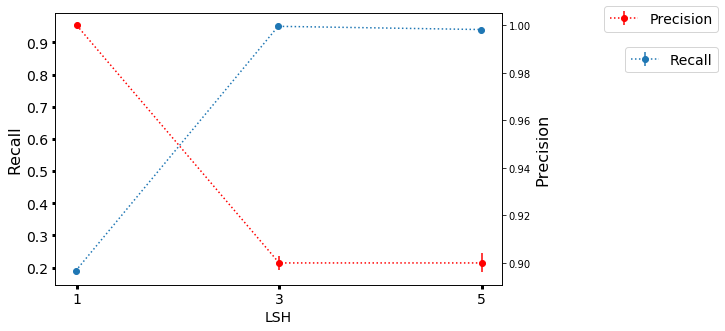

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B100
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

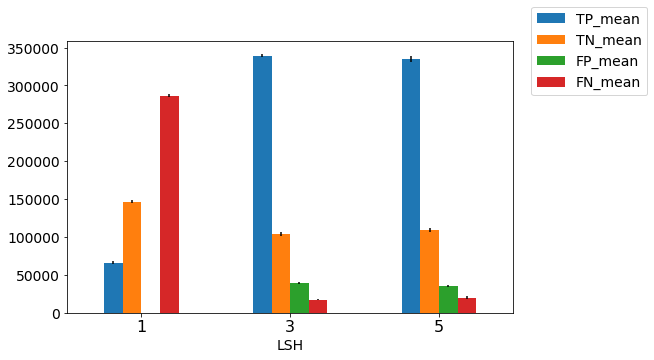

In [14]:
#MH200 bands 100
MH200B100
x=['1','3','5']
df1=MH200B100[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH200 B50

In [16]:
MH200B50=MH200[MH200['band'].eq(50)]
MH200B50.drop(MH200B50.filter(regex="Unname"),axis=1, inplace=True)
MH200B50

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
1,200,1,50,36.0,9.236,467786.6,402.142,0.0,0.000,31677.4,399.884,0.94,0.001,1.00,0.000,0.00,0.000,0.00,0.001,0.376
5,200,3,50,2539.4,171.713,466499.8,1209.553,228.6,30.276,30232.2,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
9,200,5,50,18366.2,662.229,446175.4,2694.977,23838.4,1931.082,11120.0,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


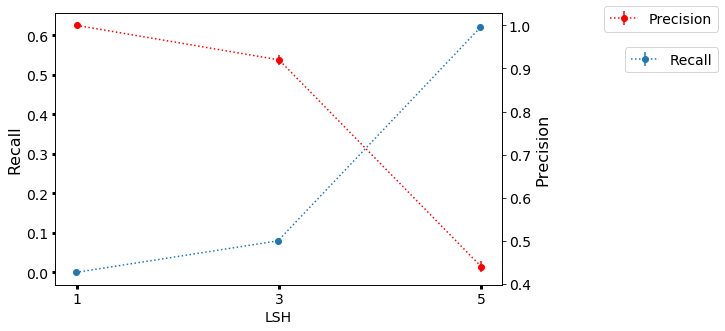

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B50
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



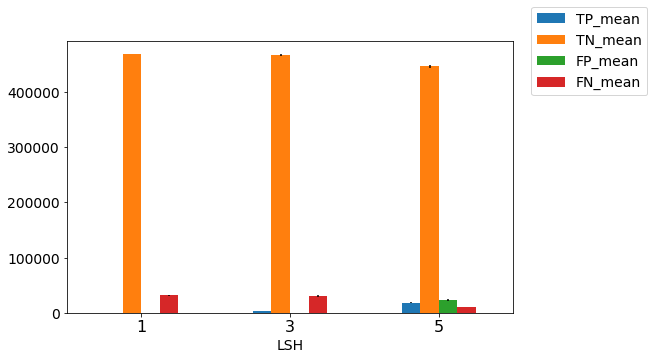

In [18]:
#MH200 bands 50
x=['1','3','5']
df1=MH200B50[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

In [19]:
MH200.band.unique()

array([ 20,  50, 100,  10], dtype=int64)

## MH200 B20

In [20]:
MH200B20=MH200[MH200['band'].eq(20)]
MH200B20.drop(MH200B20.filter(regex="Unname"),axis=1, inplace=True)
MH200B20

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.4,4.377,0.0,0.000,77.6,4.377,1.0,0.0,1.00,0.000,0.03,0.002,0.05,0.003,0.741
4,200,3,20,2.0,0.000,499425.8,3.720,0.0,0.000,72.2,3.720,1.0,0.0,1.00,0.000,0.03,0.001,0.05,0.003,0.741
8,200,5,20,10.6,1.288,499424.2,2.800,1.6,0.245,63.6,2.064,1.0,0.0,0.87,0.015,0.14,0.014,0.24,0.020,0.741


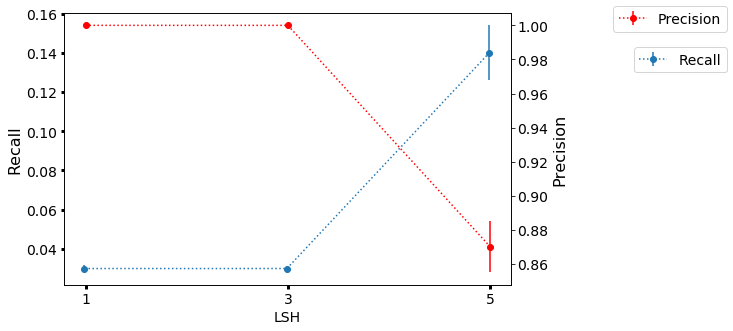

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH200B20
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

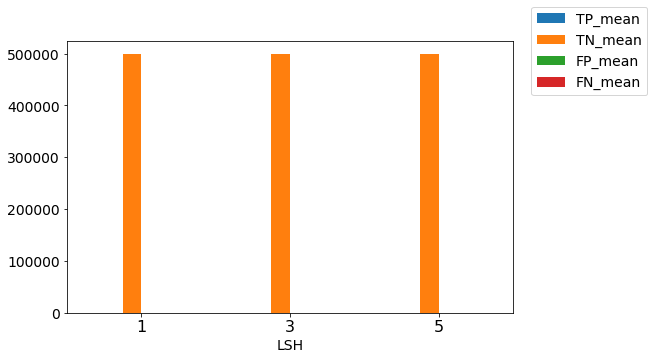

In [22]:
#MH200 band20
MH200B20
x=['1','3','5']
df1=MH200B20[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH600 B100

In [ ]:
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100

In [ ]:
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100.drop(MH600B100.filter(regex="Unname"),axis=1, inplace=True)
MH600B100

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B100
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



In [ ]:
#MH600 band100
MH600B100=MH600[MH600['band'].eq(100)]
MH600B100.drop(MH600B100.filter(regex="Unname"),axis=1, inplace=True)
MH600B100
x=['1','3','5']
df1=MH600B100[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH600 B50

In [ ]:
MH600.band.unique()

In [ ]:
MH600B50=MH600[MH600['band'].eq(50)]
MH600B50.drop(MH600B50.filter(regex="Unname"),axis=1, inplace=True)
MH600B50

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B50
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



In [ ]:
#MH600 band 50
MH600B50
x=['1','3','5']
df1=MH600B50[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

## MH600 B30

In [ ]:
MH600B30=MH600[MH600['band'].eq(30)]
MH600B30.drop(MH600B30.filter(regex="Unname"),axis=1, inplace=True)
MH600B30

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
a=MH600B30
fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.9), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()



In [ ]:
#MH600 band 50
MH600B30
x=['1','3','5']
df1=MH600B30[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df1=df1.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df1[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df1[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(8,5))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()